---
warning: false
---

In [1]:
import warnings
warnings.filterwarnings('ignore')

# Lab: Seaborn {#sec-seaborn}

In the previous notebooks we created basic, yet fast, visualisations using `matplotlib`. In this one we will be using a different plotting library called [`Seaborn`](https://seaborn.pydata.org/). Some consider it the [`ggplot`](https://ggplot2.tidyverse.org/) of Python with excellent default setting which make your data life easier. 


## Preparations

As usual, we need to load any package and data needed for our work.

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns

office_df = pd.read_csv('data/raw/office_ratings.csv', encoding='UTF-8')

And check our data:

In [ ]:
office_df.head()

We can try to replicate the same plots as in the previous notebooks.

## Scatterplots

This is relatively similar to what we did in @sec-dv-bibariate, but in this case we will be using seaborn's `replot()` method.

In [ ]:
sns.relplot(x='total_votes', y='imdb_rating', data=office_df)

### Dates

If we want to create a scatterplot with dates, we will need to convert them to dates, too:

In [ ]:
office_df['air_date'] =  pd.to_datetime(office_df['air_date'], errors='ignore')

g = sns.relplot(x="air_date", y="imdb_rating", kind="scatter", data=office_df)

## Functions

We can define our own functions. A function helps us with code we are going to run multiple times. For instance, the below function scales values between 0 and 1.

Here is a modified function from [stackoverflow](https://stackoverflow.com/questions/26414913/normalize-columns-of-pandas-data-frame).

In [ ]:
office_df.head()

In [ ]:
def normalize(df, feature_name):
    result = df.copy()
    
    max_value = df[feature_name].max()
    min_value = df[feature_name].min()
    
    result[feature_name] = (df[feature_name] - min_value) / (max_value - min_value)
    
    return result

Passing the dataframe and name of the column will return a dataframe with that column scaled between 0 and 1.

In [ ]:
normalize(office_df, 'imdb_rating')

Replacing the origonal dataframe. We can normalize both out votes and rating.

In [ ]:
office_df = normalize(office_df, 'imdb_rating')

In [ ]:
office_df = normalize(office_df, 'total_votes')

In [ ]:
office_df

### Long format

Seaborn prefers a long format table. Details of melt can be found [here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.melt.html).

In [4]:
office_df_long=pd.melt(office_df, id_vars=['season', 'episode', 'title', 'air_date'], value_vars=['imdb_rating', 'total_votes'])
office_df_long

,season,episode,title,air_date,variable,value
0,1,1,Pilot,2005-03-24,imdb_rating,7.6
1,1,2,Diversity Day,2005-03-29,imdb_rating,8.3
2,1,3,Health Care,2005-04-05,imdb_rating,7.9
3,1,4,The Alliance,2005-04-12,imdb_rating,8.1
4,1,5,Basketball,2005-04-19,imdb_rating,8.4
...,...,...,...,...,...,...
371,9,19,Stairmageddon,2013-04-11,total_votes,1484.0
372,9,20,Paper Airplane,2013-04-25,total_votes,1482.0
373,9,21,Livin' the Dream,2013-05-02,total_votes,2041.0
374,9,22,A.A.R.M.,2013-05-09,total_votes,2860.0


Which we can plot in seaborn like so.

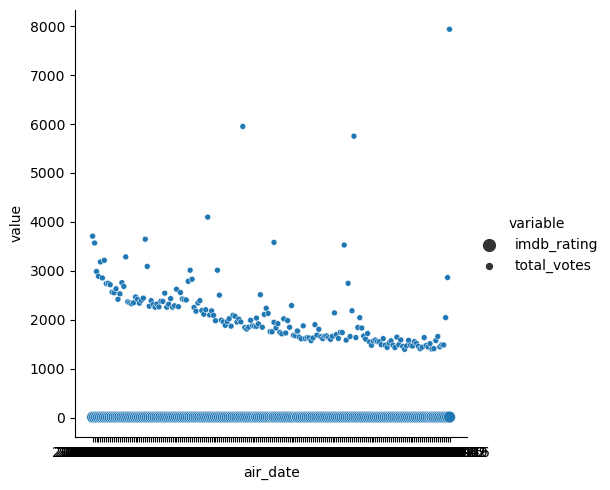

In [5]:
sns.relplot(x='air_date', y='value', size='variable', data=office_df_long)

In [ ]:
?sns.relplot